In [2]:
## Il est peut-être necessaire d'installer certaines librairies
%conda install -c conda-forge matplotlib-venn

Solving environment: done

## Package Plan ##

  environment location: /home/jeanpat/anaconda3/envs/spyder-env

  added / updated specs:
    - matplotlib-venn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    matplotlib-venn-0.11.6     |     pyh9f0ad1d_0          28 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  matplotlib-venn    conda-forge/noarch::matplotlib-venn-0.11.6-pyh9f0ad1d_0

The following packages will be UPDATED:

  openssl                                 1.1.1i-h7f98852_0 --> 1.1.1k-h7f98852_0



openssl-1.1.1k       | 2.1 MB    | ##################################### | 100% 
matplotlib-venn-0.11 | 28 KB     | ##################################### | 1

# Commençons par importer quelques modules:
   * Diagrammes de Venn
   * pyplot, on ne sait jamais...
   * le module Fraction, pour avoir des valeurs exactes pour les probabilités, ce qui est plus agréable.
   

In [3]:
from matplotlib_venn import venn3
from matplotlib import pyplot as plt
from fractions import Fraction

# Définissons trois ensembles:

  * Un ensemble $A$ comprenant 7 cartes: $A = \{roi,dame,sept,as,dix,six,valet\}$
  * Un ensemble $B$ comprenant 3 cartes: $B = \{dame,deux,dix\}$

ainsi que l'ensemble $U$ réunion des ensembles $A$, $B$ et $\{trois, quatre, cinq\}$



In [4]:
A = {'roi','dame','sept','as','dix','six','valet'}
B = {'dame','deux','dix'}
C = {'trois','quatre','cinq'}
U = A | B | C

Vérifions le type de $U$ : c'est un ensemble (set)

In [5]:
type(U)

set

Quels sont les éléments de $U$?

In [6]:
U

{'as',
 'cinq',
 'dame',
 'deux',
 'dix',
 'quatre',
 'roi',
 'sept',
 'six',
 'trois',
 'valet'}

## Représentons les ensembles avec un diagramme de Venn:

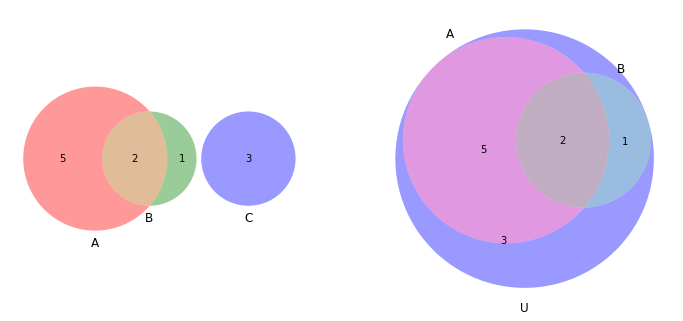

In [7]:
plt.figure(figsize=(12,16))

plt.subplot(121)
venn3([A, B, C], ('A', 'B', 'C'))

plt.subplot(122)
venn3([A, B, U], ('A', 'B', 'U'))

plt.show()

## Opération sur les ensembles:

  * Sous ensemble
  * Intersection de deux ensembles
  * Union de deux ensembles
  * nombre d'éléments d'un ensemble

### Sous ensemble:

In [8]:
print(B.issubset(A))
print(A.issubset(U))

False
True


In [9]:
print(U <= U)
print(U >=U)
print(U >= A)

True
True
True


###intersection de deux ensembles:

In [10]:
A_inter_B = B.intersection(A)

In [11]:
A_inter_B

{'dame', 'dix'}

In [12]:
A & B

{'dame', 'dix'}

In [13]:
B & A

{'dame', 'dix'}

### Union de deux ensembles:

In [14]:
A | B

{'as', 'dame', 'deux', 'dix', 'roi', 'sept', 'six', 'valet'}

### Nombre d'éléments d'un ensemble:

In [15]:
len(A | B)

8

# Probabilité d'un événement:

   * Probabilité de l'événement $A$ : $P(A) = \frac{Nombre~de~cas~favorables}
   {Nombre~de~cas~possibles}$
   * Proba de A et B : $P(A \cap B)$
   * Proba de A ou B : $P(A \cup B)$

 **Calculons une proba en python:**

 Avec une valeur approchée (argh!!)
``` python
    pA= len(A)/len(U)
```
maintenant avec une valeur exacte et le module *Fraction* importé plus haut:
``` python
    pA= Fraction(len(A),len(U))
```
On respire mieux. Profitons-en pour vérifier si on a bien :

$$P(A \cup B) = P(A)+P(B)-P(A  \cap B)$$

en montrant que:

```python
    pA_ou_B == pA+pB-pAB
```
est vrai

In [16]:
print('proba de A:', len(A)/len(U))
pA = Fraction(len(A),len(U))
print('proba de A avec fraction:', pA)
pB = Fraction(len(B),len(U))
pAB = Fraction(len(A & B),len(U))
pA_ou_B = Fraction(len(A | B), len(U))
print('proba de B avec fraction:', pB)

print('proba de A et B,  avec fraction:', pAB)
print('proba de A ou B,  avec fraction:', pA_ou_B)

proba de A: 0.6363636363636364
proba de A avec fraction: 7/11
proba de B avec fraction: 3/11
proba de A et B,  avec fraction: 2/11
proba de A ou B,  avec fraction: 8/11


In [17]:
pA_ou_B == pA+pB-pAB

True